## CelebA DataLoader Setup with Transformations

In [ ]:
# Import the necessary libraries
!pip install -q datasets diffusers transformers accelerate
!pip install --upgrade --no-deps datasets fsspec==2025.3.2 huggingface-hub diffusers transformers accelerate


from datasets import load_dataset
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import IterableDataset, DataLoader
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# For diffusion sharpening
from diffusers import StableDiffusionImg2ImgPipeline

# Streaming CelebA loader
celeba_ds = load_dataset(
    "flwrlabs/celeba",
    split="train",
    streaming=False
)

# Define the image transformations: resize to 128×128, center-crop, randomly flip, convert to tensor, and normalize
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,) * 3, (0.5,) * 3),
])

# Create an IterableDataset that applies the transform to each image from the stream
class CelebAStream(IterableDataset):
    def __init__(self, stream, tfm):
        self.stream = stream      # the streaming dataset
        self.tfm = tfm            # transformation pipeline

    def __iter__(self):
        for example in self.stream:
            # apply transform to the PIL image and yield the tensor
            yield self.tfm(example["image"])

# Wrap the streaming dataset in a DataLoader for batching and parallel loading
train_loader = DataLoader(
    CelebAStream(celeba_ds, transform),
    batch_size=64,
    num_workers=4,
    pin_memory=True
)

# Select the compute device: GPU if available, otherwise CPU
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.28k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

train-00000-of-00019.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

train-00001-of-00019.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00002-of-00019.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00003-of-00019.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00004-of-00019.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00005-of-00019.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

train-00006-of-00019.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00007-of-00019.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00008-of-00019.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00009-of-00019.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

train-00010-of-00019.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00011-of-00019.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00012-of-00019.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00013-of-00019.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00014-of-00019.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00015-of-00019.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00016-of-00019.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00017-of-00019.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00018-of-00019.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

valid-00000-of-00003.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

valid-00001-of-00003.parquet:   0%|          | 0.00/385M [00:00<?, ?B/s]

valid-00002-of-00003.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

test-00000-of-00003.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

test-00001-of-00003.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

test-00002-of-00003.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/162770 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/19867 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/19962 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## Variational Autoencoder Training & Sampling

Epoch 1, Batch 0 → Total: 0.3912, Recon: 0.3911, KLD: 0.0001
Epoch 1, Batch 10 → Total: 0.4147, Recon: 0.4147, KLD: 0.0000
Epoch 1, Batch 20 → Total: 0.3574, Recon: 0.3572, KLD: 0.0002
Epoch 1, Batch 30 → Total: 0.3656, Recon: 0.3643, KLD: 0.0013
Epoch 1, Batch 40 → Total: 0.3225, Recon: 0.3211, KLD: 0.0014
Epoch 1, Batch 50 → Total: 0.3276, Recon: 0.3255, KLD: 0.0022
Epoch 1, Batch 60 → Total: 0.3218, Recon: 0.3148, KLD: 0.0069
Epoch 1, Batch 70 → Total: 0.3651, Recon: 0.3518, KLD: 0.0133
Epoch 1, Batch 80 → Total: 0.3418, Recon: 0.3295, KLD: 0.0123
Epoch 1, Batch 90 → Total: 0.3206, Recon: 0.3012, KLD: 0.0194
Epoch 1 summary → Avg Total: 0.3414, Avg Recon: 0.3353, Avg KLD: 0.0061
Epoch 2, Batch 0 → Total: 0.2902, Recon: 0.2719, KLD: 0.0183
Epoch 2, Batch 10 → Total: 0.3112, Recon: 0.2885, KLD: 0.0227
Epoch 2, Batch 20 → Total: 0.2614, Recon: 0.2435, KLD: 0.0179
Epoch 2, Batch 30 → Total: 0.2785, Recon: 0.2509, KLD: 0.0277
Epoch 2, Batch 40 → Total: 0.2598, Recon: 0.2362, KLD: 0.0235


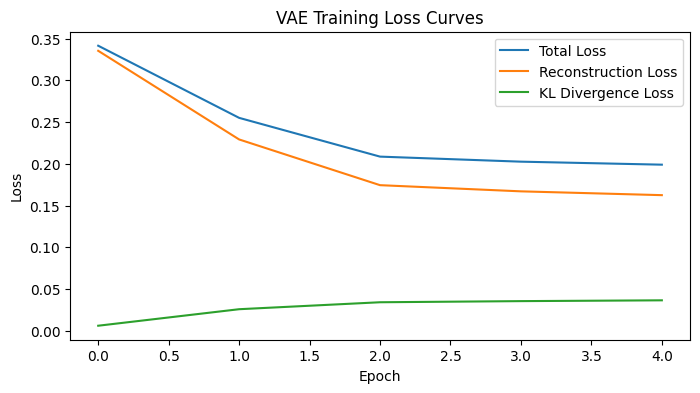

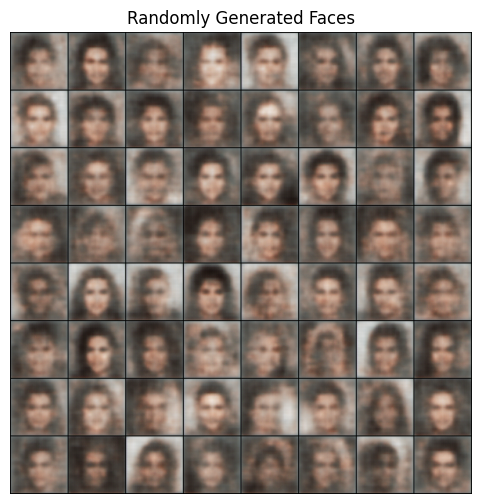

In [ ]:
# -----------------------------
# 1) Define the Variational Autoencoder (VAE)
# -----------------------------
class VAE(nn.Module):
    def __init__(self, z_dim=256):
        super().__init__()
        # Encoder: a series of Conv2d layers
        # - Input: (3, 128, 128)
        # - Each conv halves spatial dimensions (stride=2) and increases channels
        # - After 4 layers → feature map size (512, 8, 8)
        self.enc_conv = nn.Sequential(
            nn.Conv2d(3,  64, 4, 2, 1),  nn.ReLU(),   # 128×128 → 64×64, channels 3→64
            nn.Conv2d(64,128, 4, 2, 1),  nn.ReLU(),   # 64×64   → 32×32, channels 64→128
            nn.Conv2d(128,256,4, 2, 1),  nn.ReLU(),   # 32×32   → 16×16, channels 128→256
            nn.Conv2d(256,512,4, 2, 1),  nn.ReLU(),   # 16×16   →  8×8,  channels 256→512
        )
        # Flattened dimension = 512 * 8 * 8
        # Two linear layers to predict μ and log(σ²) for the latent Gaussian
        self.fc_mu     = nn.Linear(512 * 8 * 8, z_dim)
        self.fc_logvar = nn.Linear(512 * 8 * 8, z_dim)

        # Decoder: start by projecting latent z back into feature map
        self.fc_dec    = nn.Linear(z_dim, 512 * 8 * 8)
        # Then apply ConvTranspose2d layers to upsample back to 128×128 image
        self.dec_conv  = nn.Sequential(
            nn.ConvTranspose2d(512,256,4,2,1), nn.ReLU(),  # 8×8 → 16×16
            nn.ConvTranspose2d(256,128,4,2,1), nn.ReLU(),  # 16×16 → 32×32
            nn.ConvTranspose2d(128,64, 4,2,1), nn.ReLU(),  # 32×32 → 64×64
            nn.ConvTranspose2d(64,  3, 4,2,1), nn.Tanh(),  # 64×64 → 128×128, output 3 channels
        )

    def encode(self, x):
        """
        Encodes input images x into latent parameters.
        Returns:
          mu      : tensor of shape (B, z_dim)
          logvar  : tensor of shape (B, z_dim)
        """
        h = self.enc_conv(x)           # apply conv layers → (B,512,8,8)
        h = h.flatten(start_dim=1)     # flatten to (B, 512*8*8)
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        """
        Samples latent vector z via the reparameterization trick:
        z = μ + σ * ε, where ε ~ N(0, I)
        """
        std = (0.5 * logvar).exp()     # compute σ = exp(0.5 * logvar)
        eps = torch.randn_like(std)    # sample ε
        return mu + eps * std

    def decode(self, z):
        """
        Decodes latent vector z back into an image.
        """
        d = self.fc_dec(z)             # project to (B, 512*8*8)
        d = d.view(-1, 512, 8, 8)      # reshape to (B,512,8,8)
        return self.dec_conv(d)        # apply transpose conv → (B,3,128,128)

    def forward(self, x):
        """
        Full VAE forward pass:
        1) encode x → μ, logvar
        2) sample z via reparameterization
        3) decode z → reconstruction
        Returns:
          recon_x : reconstructed image tensor
          mu      : latent mean
          logvar  : latent log-variance
        """
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar


# -----------------------------
# 2) Define the VAE training loss
# -----------------------------
def vae_loss(recon_x, x, mu, logvar):
    """
    Computes combined VAE loss:
      - Reconstruction loss (MSE between recon_x and input x)
      - KL divergence between q(z|x) and p(z)=N(0,I)
    Returns:
      total_loss, recon_loss, kld_loss
    """
    # MSE reconstruction loss
    recon_loss = F.mse_loss(recon_x, x, reduction='mean')
    # KL divergence term: encourages posterior to match standard normal
    kld_loss   = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kld_loss, recon_loss, kld_loss


# -----------------------------
# 3) Initialize model and optimizer
# -----------------------------
model      = VAE(z_dim=256).to(DEVICE)
optimizer  = optim.Adam(model.parameters(), lr=1e-4)

# Training hyperparameters
epochs             = 5
max_batches_per_epoch = 100

# Containers for tracking loss
train_losses, recon_losses, kld_losses = [], [], []


# -----------------------------
# 4) Training loop
# -----------------------------
for epoch in range(1, epochs + 1):
    model.train()  # set to training mode
    running, run_recon, run_kld = 0.0, 0.0, 0.0
    count = 0

    for batch_idx, imgs in enumerate(train_loader):
        # Limit number of batches per epoch to speed up demo
        if batch_idx >= max_batches_per_epoch:
            break

        imgs = imgs.to(DEVICE)     # move data to GPU/CPU
        optimizer.zero_grad()      # reset gradients

        # Forward pass
        recon, mu, logvar = model(imgs)
        # Compute losses
        loss, recon_l, kld_l = vae_loss(recon, imgs, mu, logvar)
        # Backpropagation
        loss.backward()
        optimizer.step()          # update weights

        # Accumulate metrics
        running   += loss.item()
        run_recon += recon_l.item()
        run_kld   += kld_l.item()
        count     += 1

        # Print per-batch stats occasionally
        if batch_idx % 10 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx} → "
                  f"Total: {loss.item():.4f}, "
                  f"Recon: {recon_l.item():.4f}, "
                  f"KLD: {kld_l.item():.4f}")

    # Skip if no batches processed
    if count == 0:
        print(f"Epoch {epoch}: no batches processed.")
        continue

    # Record average losses for the epoch
    train_losses.append(running / count)
    recon_losses.append(run_recon / count)
    kld_losses.append(run_kld / count)

    print(f"Epoch {epoch} summary → "
          f"Avg Total: {running/count:.4f}, "
          f"Avg Recon: {run_recon/count:.4f}, "
          f"Avg KLD: {run_kld/count:.4f}")


# -----------------------------
# 5) Plot training loss curves
# -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Total Loss')
plt.plot(recon_losses, label='Reconstruction Loss')
plt.plot(kld_losses, label='KL Divergence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VAE Training Loss Curves')
plt.legend()
plt.show()


# -----------------------------
# 6) Generate new samples
# -----------------------------
model.eval()  # switch to evaluation mode
with torch.no_grad():
    # Sample random latent vectors from N(0,1)
    z = torch.randn(64, 256).to(DEVICE)
    # Decode to images
    samples = model.decode(z).cpu()

# Arrange sample images into an 8×8 grid
grid = vutils.make_grid(
    samples,
    nrow=8,
    normalize=True,       # scale outputs to [0,1]
    value_range=(-1, 1)   # because outputs are tanh
)

plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(grid.permute(1, 2, 0))  # rearrange channels for matplotlib
plt.title('Randomly Generated Faces')
plt.show()


## Face Interpolation via Latent-Space Blending

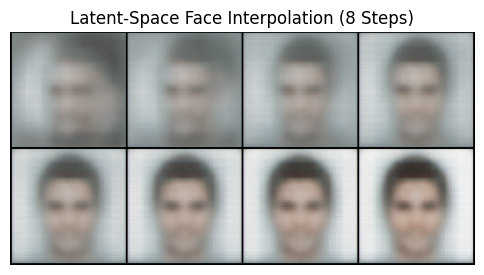

In [ ]:
# ----------------------------
# Face Interpolation Function
# ----------------------------
def interpolate_faces(img1, img2, steps=8):
    """
    Generates a sequence of interpolated faces between two input images.

    Args:
        img1 (Tensor): First face image tensor of shape (3, H, W), normalized.
        img2 (Tensor): Second face image tensor of shape (3, H, W), normalized.
        steps (int): Number of frames (including endpoints) to generate.
                     Higher values yield smoother transitions.

    Returns:
        Tensor: A concatenated tensor of shape (steps, 3, H, W) containing
                the decoded images for each interpolation step.
    """
    # 1) Encode each image to its latent mean vector (mu)
    #    We discard the log-variance since we want a deterministic path.
    mu1, _ = model.encode(img1.unsqueeze(0).to(DEVICE))
    mu2, _ = model.encode(img2.unsqueeze(0).to(DEVICE))

    # 2) Linearly blend between mu1 and mu2
    #    torch.linspace generates 'steps' evenly spaced scalars from 0→1.
    #    For each alpha, compute (1 - alpha)*mu1 + alpha*mu2.
    mus = [
        (1 - alpha) * mu1 + alpha * mu2
        for alpha in torch.linspace(0, 1, steps)
    ]

    # 3) Decode each interpolated latent back to image space
    #    We wrap in torch.no_grad() since we're only doing inference.
    with torch.no_grad():
        decoded = [model.decode(m).cpu() for m in mus]

    # 4) Concatenate the list of tensors along the batch dimension
    #    Resulting shape: (steps, 3, H, W)
    return torch.cat(decoded)


# ----------------------------
# Example Usage & Visualization
# ----------------------------
# 1) Get two sample images from the data loader
imgs_iter = iter(train_loader)
orig1, orig2 = next(imgs_iter)[0], next(imgs_iter)[1]

# 2) Run interpolation with desired number of steps
interp = interpolate_faces(orig1, orig2, steps=8)

# 3) Arrange the interpolated faces into a grid for display
grid_i = vutils.make_grid(
    interp,
    nrow=4,               # number of columns in the grid
    normalize=True,       # scale pixel values to [0,1] for plotting
    value_range=(-1, 1)   # account for tanh output range
)

# 4) Plot the grid without axis ticks
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(grid_i.permute(1, 2, 0))  # rearrange to H×W×C for matplotlib
plt.title("Latent-Space Face Interpolation (8 Steps)")
plt.show()

## Hair-Color Manipulation via Latent Arithmetic

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

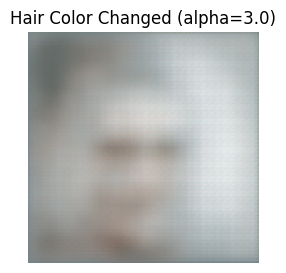

In [ ]:
# ----------------------------
# Hair-Color Manipulation Setup
# ----------------------------
from datasets import load_dataset
from torch.utils.data import DataLoader

# 1) Load a small labeled subset of CelebA (first 5,000 examples)
#    This version has Blond_Hair at the top level.
attr_ds = load_dataset(
    "flwrlabs/celeba",
    split="train[:5000]",
    streaming=False
)

# 2) Build (image, Blond_Hair) pairs from the subset
pairs = [(ex["image"], ex["Blond_Hair"]) for ex in attr_ds]

# 3) Define a collate_fn to transform and batch these pairs
def collate_fn(batch):
    imgs, labels = zip(*batch)
    # Apply the same transform pipeline you defined earlier
    imgs = torch.stack([transform(img) for img in imgs]).to(DEVICE)
    labels = torch.tensor(labels, dtype=torch.bool).to(DEVICE)
    return imgs, labels

blond_loader = DataLoader(
    pairs,
    batch_size=64,
    shuffle=False,
    collate_fn=collate_fn
)

# 4) Extract latent means mu from the encoder for each batch,
#    and separate into blond vs. non-blond groups
pos_mus, neg_mus = [], []
model.eval()
with torch.no_grad():
    for imgs, labels in blond_loader:
        mu, _ = model.encode(imgs)
        pos_mus.append(mu[labels])    # all mu where Blond_Hair == 1
        neg_mus.append(mu[~labels])   # all mu where Blond_Hair == 0

# 5) Compute the average mu for each group
pos_mu = torch.cat(pos_mus).mean(0)   # mean latent for blond hair
neg_mu = torch.cat(neg_mus).mean(0)   # mean latent for non-blond hair

# 6) Compute and normalize the hair-direction vector
hair_direction = (pos_mu - neg_mu)
hair_direction = hair_direction / hair_direction.norm()  # unit direction
hair_direction = hair_direction.cpu()

# 7) Save it once for future reuse
torch.save(hair_direction, "hair_direction.pt")


# ----------------------------
# Hair-Color Manipulation Function
# ----------------------------
# Load the precomputed direction
hair_direction = torch.load("hair_direction.pt").to(DEVICE)

def change_hair_color(img, alpha=3.0):
    """
    Alters the hair color of a single face image by adding
    the precomputed direction vector to its latent code.

    Args:
        img (Tensor): A normalized face image of shape (3, H, W), in [-1, 1].
        alpha (float): How strongly to apply the hair-color change.
                       (0.0 = no change; larger = stronger effect)

    Returns:
        Tensor: The decoded, hair-color-modified image, still in [-1, 1].
    """
    # Encode to get the latent mean vector (mu)
    mu, _ = model.encode(img.unsqueeze(0).to(DEVICE))  # shape: (1, z_dim)

    # Add the normalized direction, scaled by alpha
    z_new = mu + alpha * hair_direction.unsqueeze(0)

    # Decode back into image space
    with torch.no_grad():
        out = model.decode(z_new).cpu()[0]  # shape: (3, H, W)

    return out


# ----------------------------
# Example Usage & Visualization
# ----------------------------
# Pick two sample images to compare original vs. modified
imgs_iter = iter(train_loader)
orig1 = next(imgs_iter)[0]  # first image in the first batch

# Apply hair-color change
modified = change_hair_color(orig1, alpha=3.0)

# Convert from tanh [-1,1] to [0,1] for display
vis = (modified.permute(1, 2, 0) * 0.5) + 0.5  # shape: (H, W, C)

plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(vis)
plt.title("Hair Color Changed (alpha=3.0)")
plt.show()


## Masked Face Sharpening with Stable Diffusion Img2Img

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<ipython-input-7-2876b02e679f>:90: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.inference_mode(), torch.cuda.amp.autocast(DTYPE==torch.float16):


  0%|          | 0/8 [00:00<?, ?it/s]

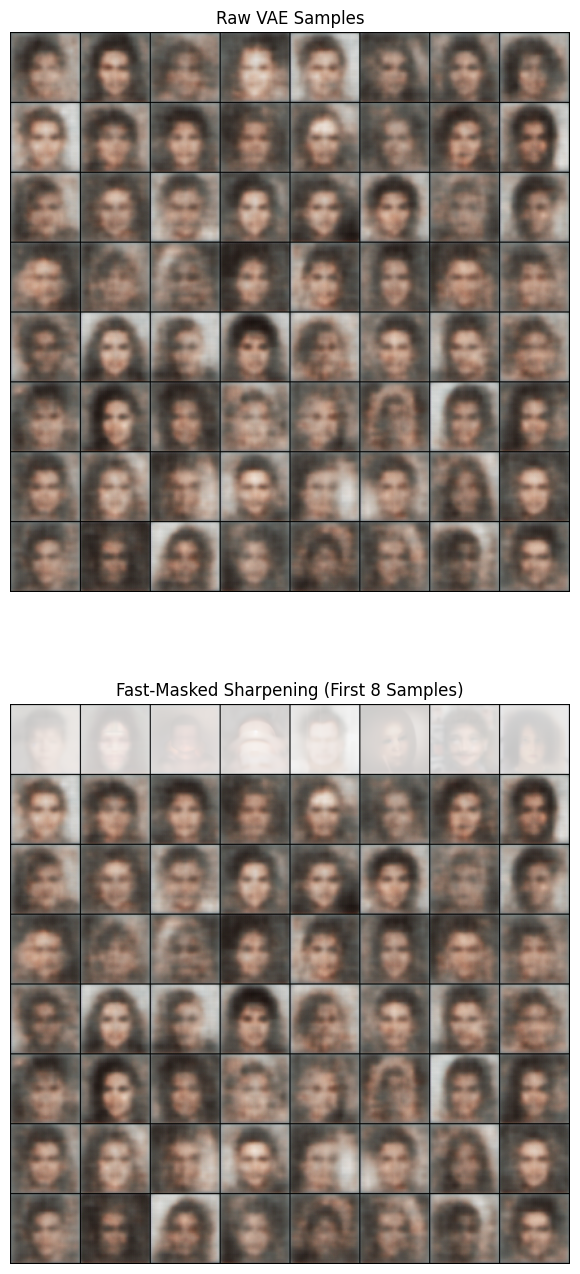

In [ ]:
from torchvision.transforms import ToPILImage, ToTensor, Resize
from diffusers import StableDiffusionImg2ImgPipeline, EulerAncestralDiscreteScheduler
from PIL import Image, ImageDraw
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# -------------------------------------------------
# 0) Imports & device/precision setup
# -------------------------------------------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE  = torch.float16 if torch.cuda.is_available() else torch.float32

# -------------------------------------------------
# 1) Load & configure Img2Img pipeline
#    - Euler Ancestral scheduler for fewer steps
#    - Disable NSFW filter so we keep content
#    - Try to enable efficient attention
# -------------------------------------------------
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=DTYPE,
)
pipe.scheduler      = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.safety_checker = None
try:
    pipe.enable_xformers_memory_efficient_attention()
except:
    pass
pipe.to(DEVICE)

# Helper: map [0,1] PIL output → [-1,1] tensor
inv_norm = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])

# -------------------------------------------------
# 2) Create a simple central-face mask generator
#    (white ellipse in center; black elsewhere)
# -------------------------------------------------
def make_face_mask(size:int):
    """
    Returns a PIL 'L' mask image of shape (size,size) where
    an ellipse in the center is white (255) and background is black (0).
    This will protect the background from being modified.
    """
    mask = Image.new("L", (size, size), 0)
    draw = ImageDraw.Draw(mask)
    # ellipse bounds: centered, covering ~70% width/height
    margin = int(size * 0.15)
    draw.ellipse(
        [margin, margin, size-margin, size-margin],
        fill=255
    )
    return mask

# -------------------------------------------------
# 3) Fast mask-aware sharpening function
# -------------------------------------------------
def fast_sharpen_masked(
    batch: torch.Tensor,    # (B,3,128,128), values in [-1,1]
    n_samples: int = 8,     # how many to sharpen from the front
    strength: float = 0.55, # diffusion strength
    guidance_scale: float = 7.5,
    num_steps: int = 15,    # fewer steps → faster
    size: int = 384         # pipeline resolution
) -> torch.Tensor:
    """
    Applies Img2Img sharpening only inside a central-face mask,
    leaving the background exactly as in the original VAE output.

    Steps:
      1) Take the first n_samples tensors from the batch.
      2) Convert each to a PIL image at `size×size`.
      3) Generate a central ellipse mask.
      4) Call pipe(...) with both image and mask.
      5) Convert the result back to tensor [-1,1].
      6) Stitch sharpened subset back into the original batch.
    """
    # 3.1) split subset
    subset = batch[:n_samples]

    # 3.2) convert to PIL and resize
    pil_images = [
        ToPILImage()(((img * 0.5) + 0.5).clamp(0,1)).resize((size, size))
        for img in subset
    ]
    # 3.3) make identical masks for each image
    mask_images = [ make_face_mask(size) for _ in range(n_samples) ]

    # 3.4) run Img2Img with mask
    with torch.inference_mode(), torch.cuda.amp.autocast(DTYPE==torch.float16):
        results = pipe(
            prompt=[""] * n_samples,   # identity prompt
            image=pil_images,
            mask_image=mask_images,
            strength=strength,
            guidance_scale=guidance_scale,
            num_inference_steps=num_steps
        ).images

    # 3.5) convert back to [-1,1] tensors at 128×128
    sharpened = torch.stack([
        inv_norm(Resize(128)(ToTensor()(img)))
        for img in results
    ]).to(batch.device)

    # 3.6) reconstruct full batch: sharpened subset + unchanged remainder
    out = batch.clone()
    out[:n_samples] = sharpened
    return out

# -------------------------------------------------
# 4) Example usage
#    - Assume `samples` is your (64,3,128,128) tensor
# -------------------------------------------------
sharp_samples = fast_sharpen_masked(
    samples,
    n_samples=8,
    strength=0.55,
    guidance_scale=7.5,
    num_steps=15,
    size=384
)

# -------------------------------------------------
# 5) Visualize before & after
# -------------------------------------------------
orig_grid  = vutils.make_grid(samples,       nrow=8, normalize=True, value_range=(-1,1))
sharp_grid = vutils.make_grid(sharp_samples, nrow=8, normalize=True, value_range=(-1,1))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,16))
ax1.imshow(orig_grid.permute(1,2,0)); ax1.axis("off")
ax1.set_title("Raw VAE Samples")
ax2.imshow(sharp_grid.permute(1,2,0)); ax2.axis("off")
ax2.set_title("Fast-Masked Sharpening (First 8 Samples)")
plt.show()


## Latent-Space Hair-Color Editing with UnsharpMask and Diffusion Sharpening







Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

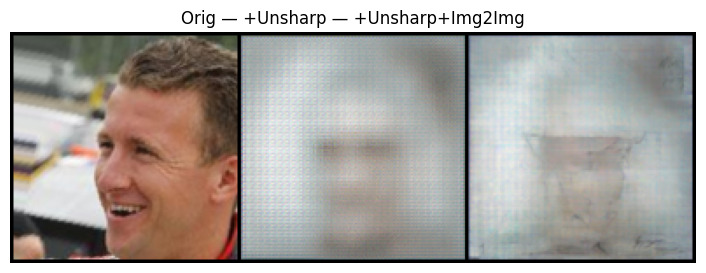

In [ ]:
from PIL import ImageFilter
from torchvision.transforms import ToPILImage, ToTensor, Resize
from diffusers import StableDiffusionImg2ImgPipeline
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# --- 1) define a simple unsharp mask helper ---
def pil_unsharp(img_tensor, radius=1.5, percent=150, threshold=1):
    """
    Sharpen an image tensor in [-1,1] via PIL's UnsharpMask.
    """
    # to PIL [0,1]
    pil_img = ToPILImage()((img_tensor * 0.5 + 0.5).clamp(0,1))
    pil_img = pil_img.filter(
        ImageFilter.UnsharpMask(radius=radius, percent=percent, threshold=threshold)
    )
    # back to tensor [-1,1]
    t = ToTensor()(pil_img)
    return (t * 2 - 1)

# --- 2) (optional) set up a small Img2Img pipeline for stronger detail ---
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
)
pipe.safety_checker = None
pipe.to(DEVICE)

# make a Resize transform once
resize128 = Resize((128, 128))

def sharpen_with_img2img(img_tensor, strength=0.4, guidance_scale=7.5):
    """
    Runs a single-image Img2Img pass to recover detail.
    """
    # 1) de-normalize to [0,1] and to PIL at 512×512
    pil = ToPILImage()((img_tensor * 0.5 + 0.5).clamp(0,1)).resize((512,512))
    # 2) run Img2Img
    result = pipe(
        prompt="",
        image=pil,
        strength=strength,
        guidance_scale=guidance_scale
    ).images[0]
    # 3) back to tensor [0,1]
    t = ToTensor()(result)
    # 4) resize tensor properly to 128×128
    t128 = resize128(t)
    # 5) map [0,1]→[-1,1]
    return (t128 * 2 - 1)

# --- 3) new composite hair-color function ---
def change_hair_color_sharp(img, alpha=3.0,
                            use_unsharp=True,
                            use_img2img=False):
    """
    1) shift hair in latent space
    2) decode
    3) optionally sharpen globally (unsharp mask or Img2Img)
    """
    # encode & shift latent
    mu, _ = model.encode(img.unsqueeze(0).to(DEVICE))
    z_new = mu + alpha * hair_direction.unsqueeze(0)
    with torch.no_grad():
        out = model.decode(z_new).cpu()[0]   # [-1,1] tensor

    # 1) quick unsharp
    if use_unsharp:
        out = pil_unsharp(out, radius=1.5, percent=200, threshold=1)

    # 2) stronger, slower Img2Img detail
    if use_img2img:
        out = sharpen_with_img2img(out, strength=0.4, guidance_scale=7.5)

    return out

# --- 4) visualize ---
orig = next(iter(train_loader))[0]
mod1 = change_hair_color_sharp(orig, alpha=3.0, use_unsharp=True,  use_img2img=False)
mod2 = change_hair_color_sharp(orig, alpha=3.0, use_unsharp=True,  use_img2img=True)

grid = vutils.make_grid([orig, mod1, mod2],
                        nrow=3, normalize=True, value_range=(-1,1))
plt.figure(figsize=(9,3))
plt.imshow(grid.permute(1,2,0))
plt.axis("off")
plt.title("Orig — +Unsharp — +Unsharp+Img2Img")
plt.show()
